# Benchmarking and Profiling

### Examples 2-1, 2-2, 2-3 and 2-4

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#area of complex space
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_image = -0.62772, -.42193


In [3]:

def calc_pure_python(desired_width, max_iterations):
    """Create a list of complex coordinates (zs) and complex parameters (cs),
    build Julia set"""
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2

    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    zs = []
    cs = []

    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_image))

    print("Lenght of x: ", len(x))
    print("Total elements: ", len(zs))
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()

    secs = end_time - start_time
    print(calculate_z_serial_purepython.__name__ + "took", secs, "seconds")

    assert sum(output) == 33219980
    return output


def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""

    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output


In [6]:
if __name__ == "__main__":
    #Calcute the Julia set using a pure python solution with
    #reasonable defaults for a laptop
    desired_width = 1000  # Set this to the width you desire
    max_iterations = 300  # Set this to the max iterations you desire

    # Make sure to capture the output of calc_pure_python
    output = calc_pure_python(desired_width, max_iterations)

Lenght of x:  1000
Total elements:  1000000
calculate_z_serial_purepythontook 4.806420087814331 seconds


#### Plotting the pure and false gray_scale

In [111]:
  # Reshape output to a 2D array for image representation
output_2d = [output[i:i+desired_width] for i in range(0, desired_width*desired_width, desired_width)]

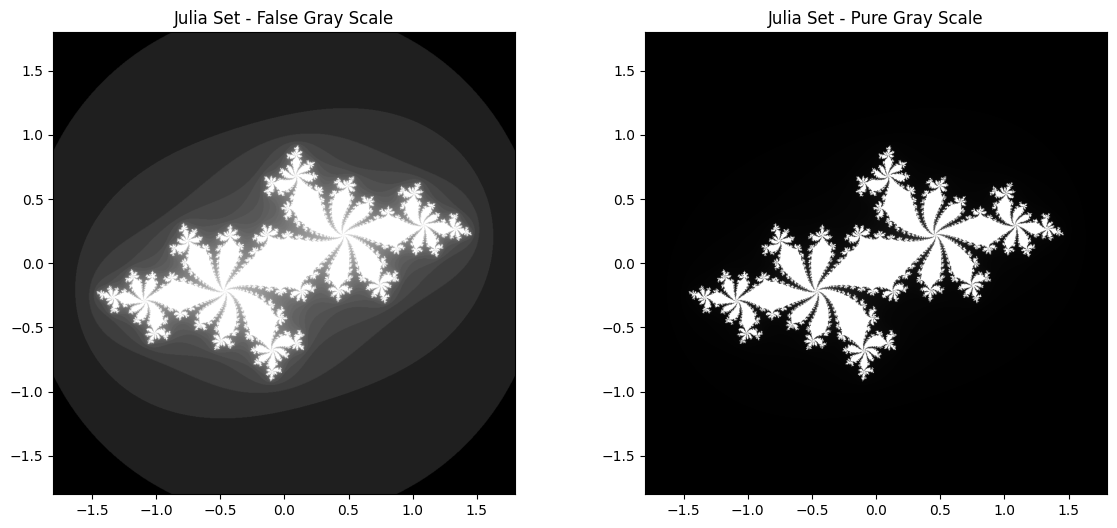

In [112]:
output_false_gray = np.array(output_2d)
output_false_gray = np.log(output_false_gray + 1)

    # Convert iterations to pure gray scale (normalize)
output_pure_gray = np.array(output_2d)
max_iter = np.max(output_pure_gray)
output_pure_gray = output_pure_gray / max_iter

    # Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    # False Gray Scale
axes[0].imshow(output_false_gray, cmap="gray", extent=(x1, x2, y1, y2))
axes[0].set_title("Julia Set - False Gray Scale")
    # Pure Gray Scale
axes[1].imshow(output_pure_gray, cmap="gray", extent=(x1, x2, y1, y2))
axes[1].set_title("Julia Set - Pure Gray Scale")
plt.show()

### Example 2.5 defining a decorator to automate timing measurements 

In [9]:
from functools import wraps

In [14]:
def timefn(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = time.time()
        result = fn(*args, **kwargs)
        t2 = time.time()
        print(f"@timefn: {fn.__name__} took {t2 - t1} seconds")
        return result
    return measure_time

@timefn
def calculate_z_serial_purepython(maxiter, zs, cs):

    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output



In [15]:
if __name__ == "__main__":
    #Calcute the Julia set using a pure python solution with
    #reasonable defaults for a laptop
    desired_width = 1000
    max_iterations = 300 

    # Make sure to capture the output of calc_pure_python
    output = calc_pure_python(desired_width, max_iterations)

Lenght of x:  1000
Total elements:  1000000
@timefn: calculate_z_serial_purepython took 4.65494179725647 seconds
calculate_z_serial_purepythontook 4.655101776123047 seconds


In [16]:
# Generate the list of complex coordinates (zs) and complex parameters (cs)
# Calculate steps based on the desired width
x_step = (x2 - x1) / desired_width
y_step = (y2 - y1) / desired_width

zs = [complex(x, y) for y in np.arange(y2, y1, -y_step) for x in np.arange(x1, x2, x_step)]
cs = [complex(c_real, c_image) for _ in zs]

#### timing it in Juypter Notebook with %timeit module

In [18]:
%timeit -n 10 -r 5 calculate_z_serial_purepython(300, zs, cs)

@timefn: calculate_z_serial_purepython took 4.617522954940796 seconds
@timefn: calculate_z_serial_purepython took 4.3405210971832275 seconds
@timefn: calculate_z_serial_purepython took 4.352038860321045 seconds
@timefn: calculate_z_serial_purepython took 4.51752495765686 seconds
@timefn: calculate_z_serial_purepython took 4.423609972000122 seconds
@timefn: calculate_z_serial_purepython took 4.29599404335022 seconds
@timefn: calculate_z_serial_purepython took 4.293154954910278 seconds
@timefn: calculate_z_serial_purepython took 4.2928290367126465 seconds
@timefn: calculate_z_serial_purepython took 4.302321195602417 seconds
@timefn: calculate_z_serial_purepython took 4.2904438972473145 seconds
@timefn: calculate_z_serial_purepython took 4.351686000823975 seconds
@timefn: calculate_z_serial_purepython took 4.284789800643921 seconds
@timefn: calculate_z_serial_purepython took 4.282880067825317 seconds
@timefn: calculate_z_serial_purepython took 4.2929041385650635 seconds
@timefn: calculate

### And this is how to time it in terminal
![Screenshot 2024-03-21 at 9.59.49 p.m..png](<attachment:Screenshot 2024-03-21 at 9.59.49 p.m..png>)
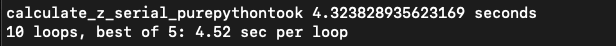
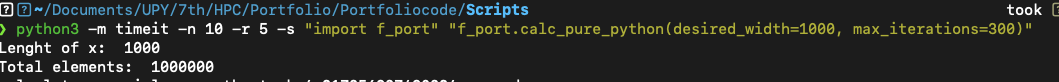

# cProfile Module

For utilizing the module in terminal it is done like follows: 

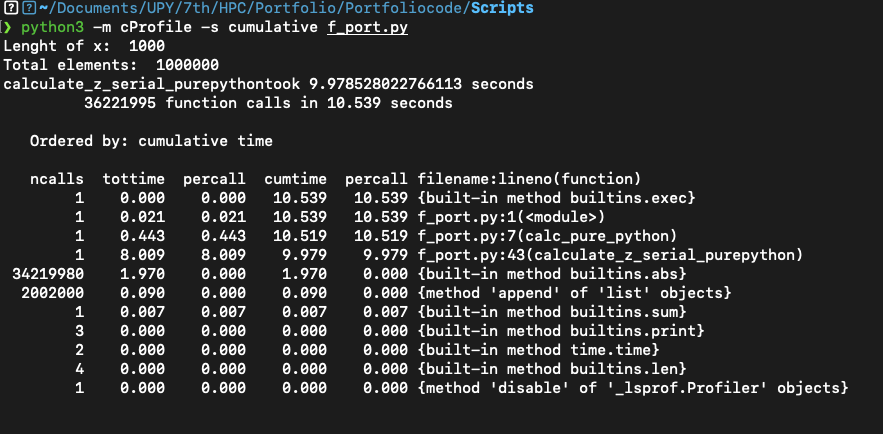

It is sorted with the cumulative time, so It can be clear what takes more and less time and the reason it does

#### Doing the same organized cumulative time in the notebook

In [19]:
import pstats

In [20]:
p = pstats.Stats("profile.stats")
p.sort_stats("cumulative")

In [21]:
p.print_stats()

Thu Mar 21 22:11:34 2024    profile.stats

         36221995 function calls in 10.757 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   10.757   10.757 {built-in method builtins.exec}
        1    0.022    0.022   10.757   10.757 f_port.py:1(<module>)
        1    0.451    0.451   10.734   10.734 f_port.py:8(calc_pure_python)
        1    8.182    8.182   10.185   10.185 f_port.py:44(calculate_z_serial_purepython)
 34219980    2.004    0.000    2.004    0.000 {built-in method builtins.abs}
  2002000    0.090    0.000    0.090    0.000 {method 'append' of 'list' objects}
        1    0.007    0.007    0.007    0.007 {built-in method builtins.sum}
        3    0.000    0.000    0.000    0.000 {built-in method builtins.print}
        2    0.000    0.000    0.000    0.000 {built-in method time.time}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0

### Syntesis 
### Overview
The `f_port.py` script was analyzed using the Python cProfile module, which provided detailed insights into the execution time and the number of function calls.

### Profiling Details

- **Function of Interest**: `calculate_z_serial_purepython`
  - **Cumulative Time**: 10.539 seconds, which is the time taken by this function including all the calls it made to other functions.
  - **Total Time**: 10.519 seconds spent solely within this function, excluding time in sub-functions.

- **Total Function Calls**: 36,221,995
  This high number indicates extensive computational tasks, likely due to iterative processes within the function.

### Significant Findings

- **Abs Method Calls**: 34,219,980 calls to `builtins.abs`
  - This suggests that the function is performing a vast number of absolute value calculations, which is common in algorithms dealing with complex numbers or geometric computations.

- **List Append Operations**: 2,002,000 calls to `method 'append' of 'list' objects`
  - The code seems to be appending to lists frequently, which can be a costly operation depending on the list size and the frequency of appends.

- **Other Built-in Methods**:
  - `builtins.sum`: The `sum` method has a relatively minor impact on performance, but it indicates summing operations over iterables.
  - `builtins.print`, `time.time`, `builtins.len`: These methods are called a few times, which suggests logging or monitoring operations and typical length checks.


The `calculate_z_serial_purepython` function is the primary performance bottleneck, and optimizing it should be the focus for improving the script's execution time.

## Snakeviz 

To visualize the snakeviz profike.stats previously created the input in terminal done was:

![Screenshot 2024-03-21 at 10.30.56 p.m..png](<attachment:Screenshot 2024-03-21 at 10.30.56 p.m..png>)


Using the shakeviz interface the output is:

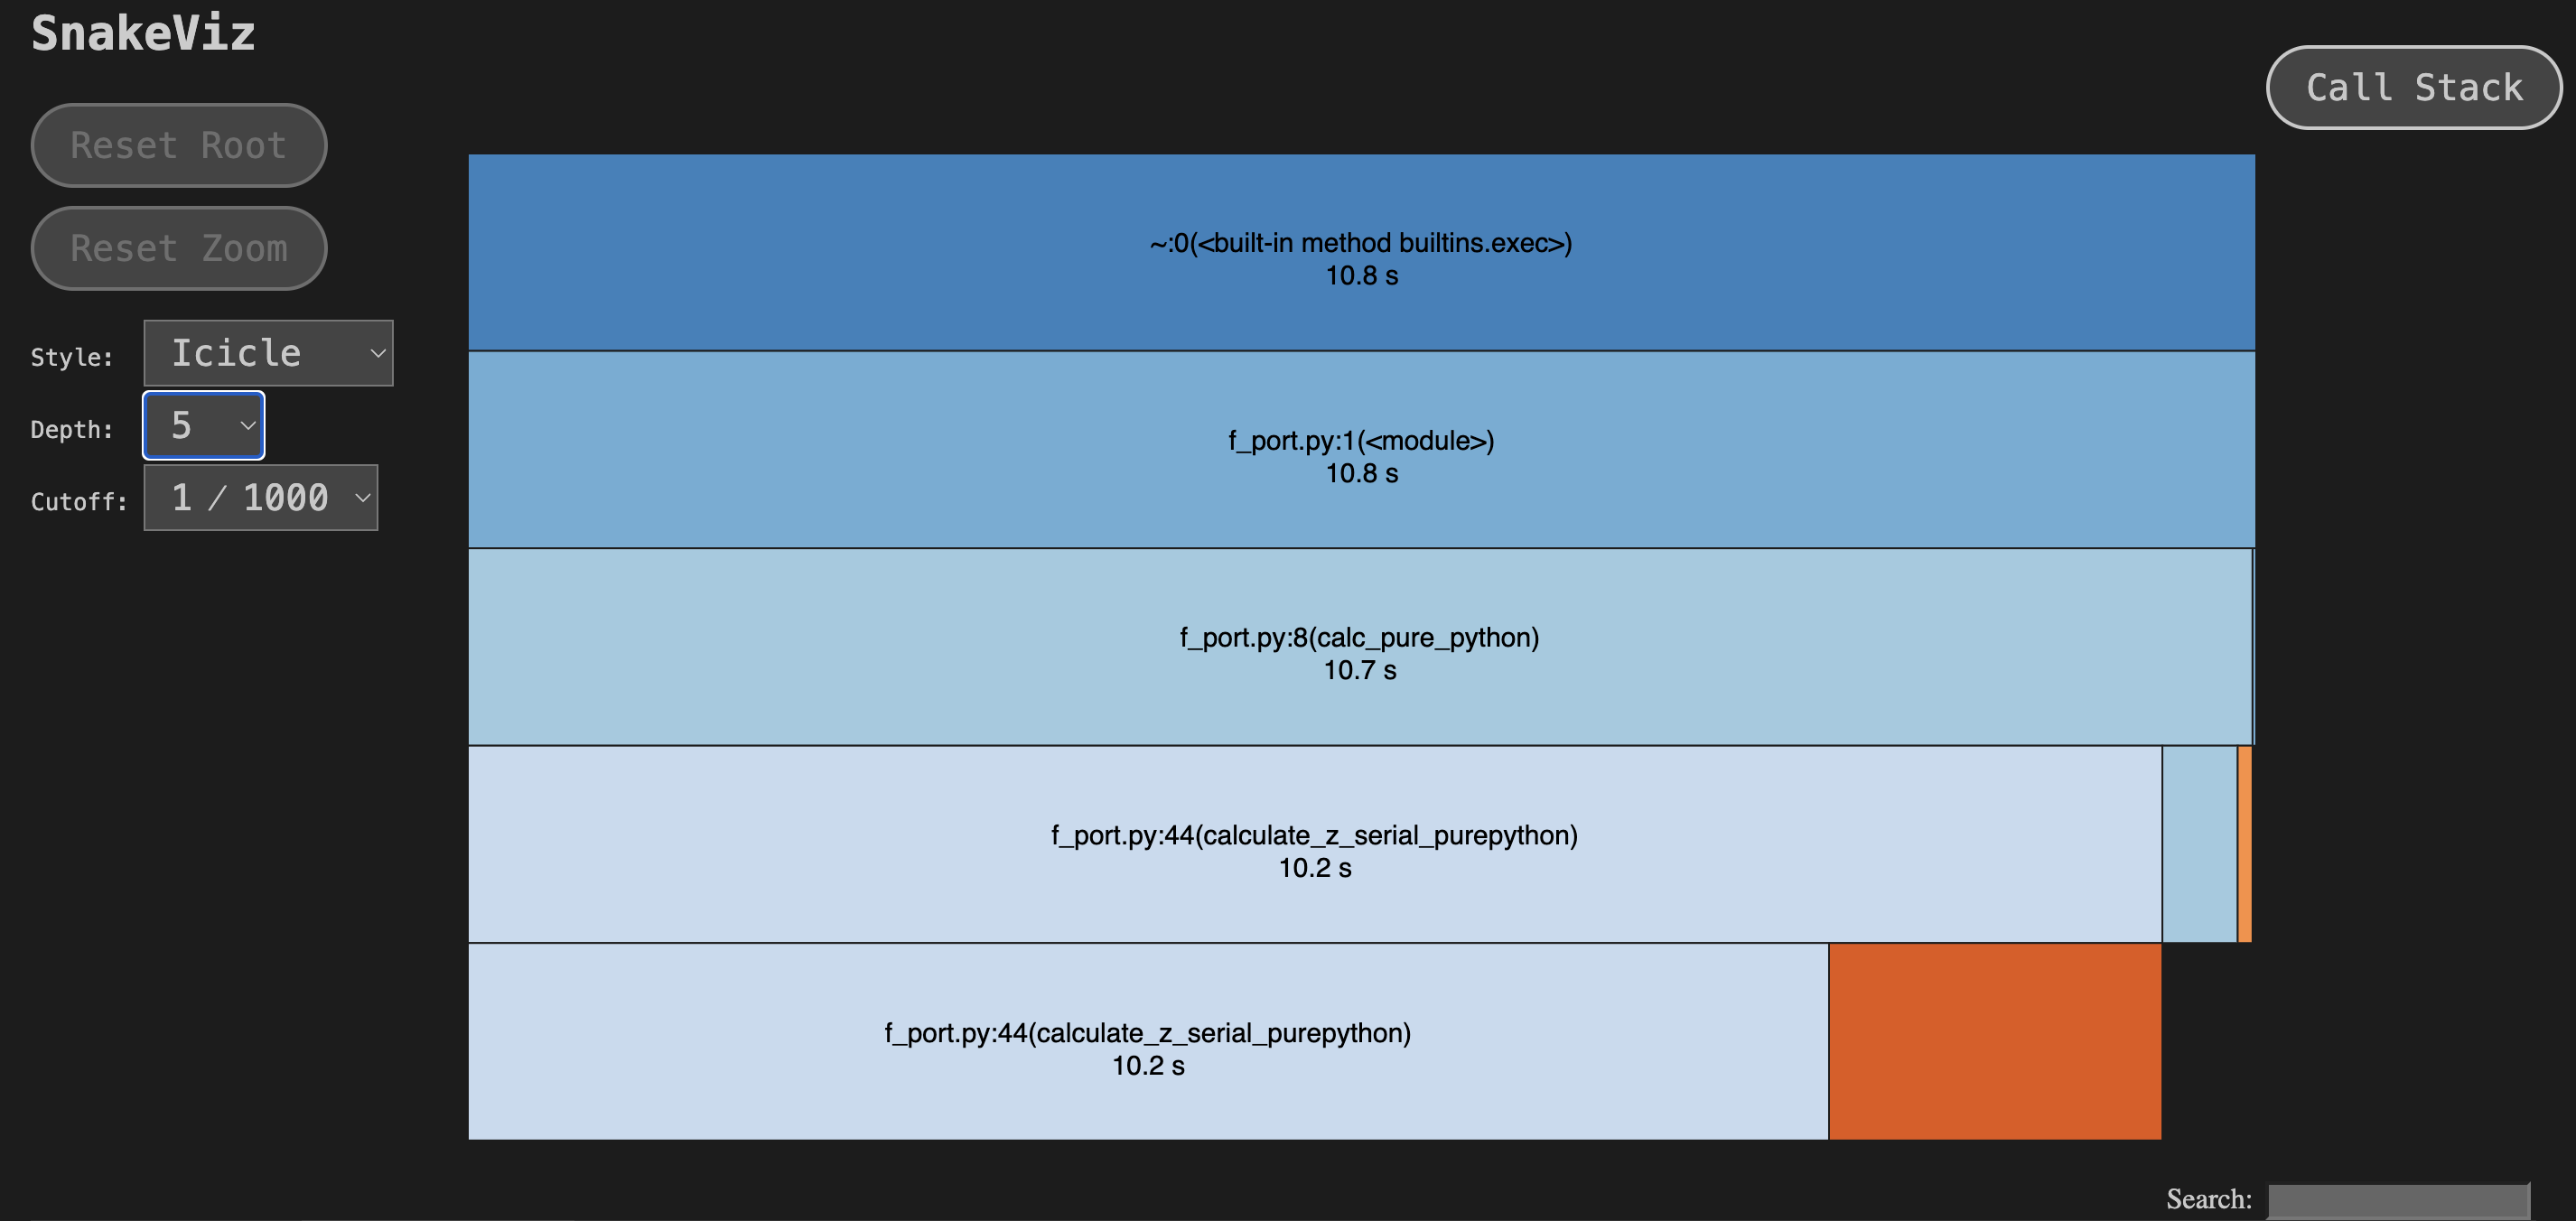


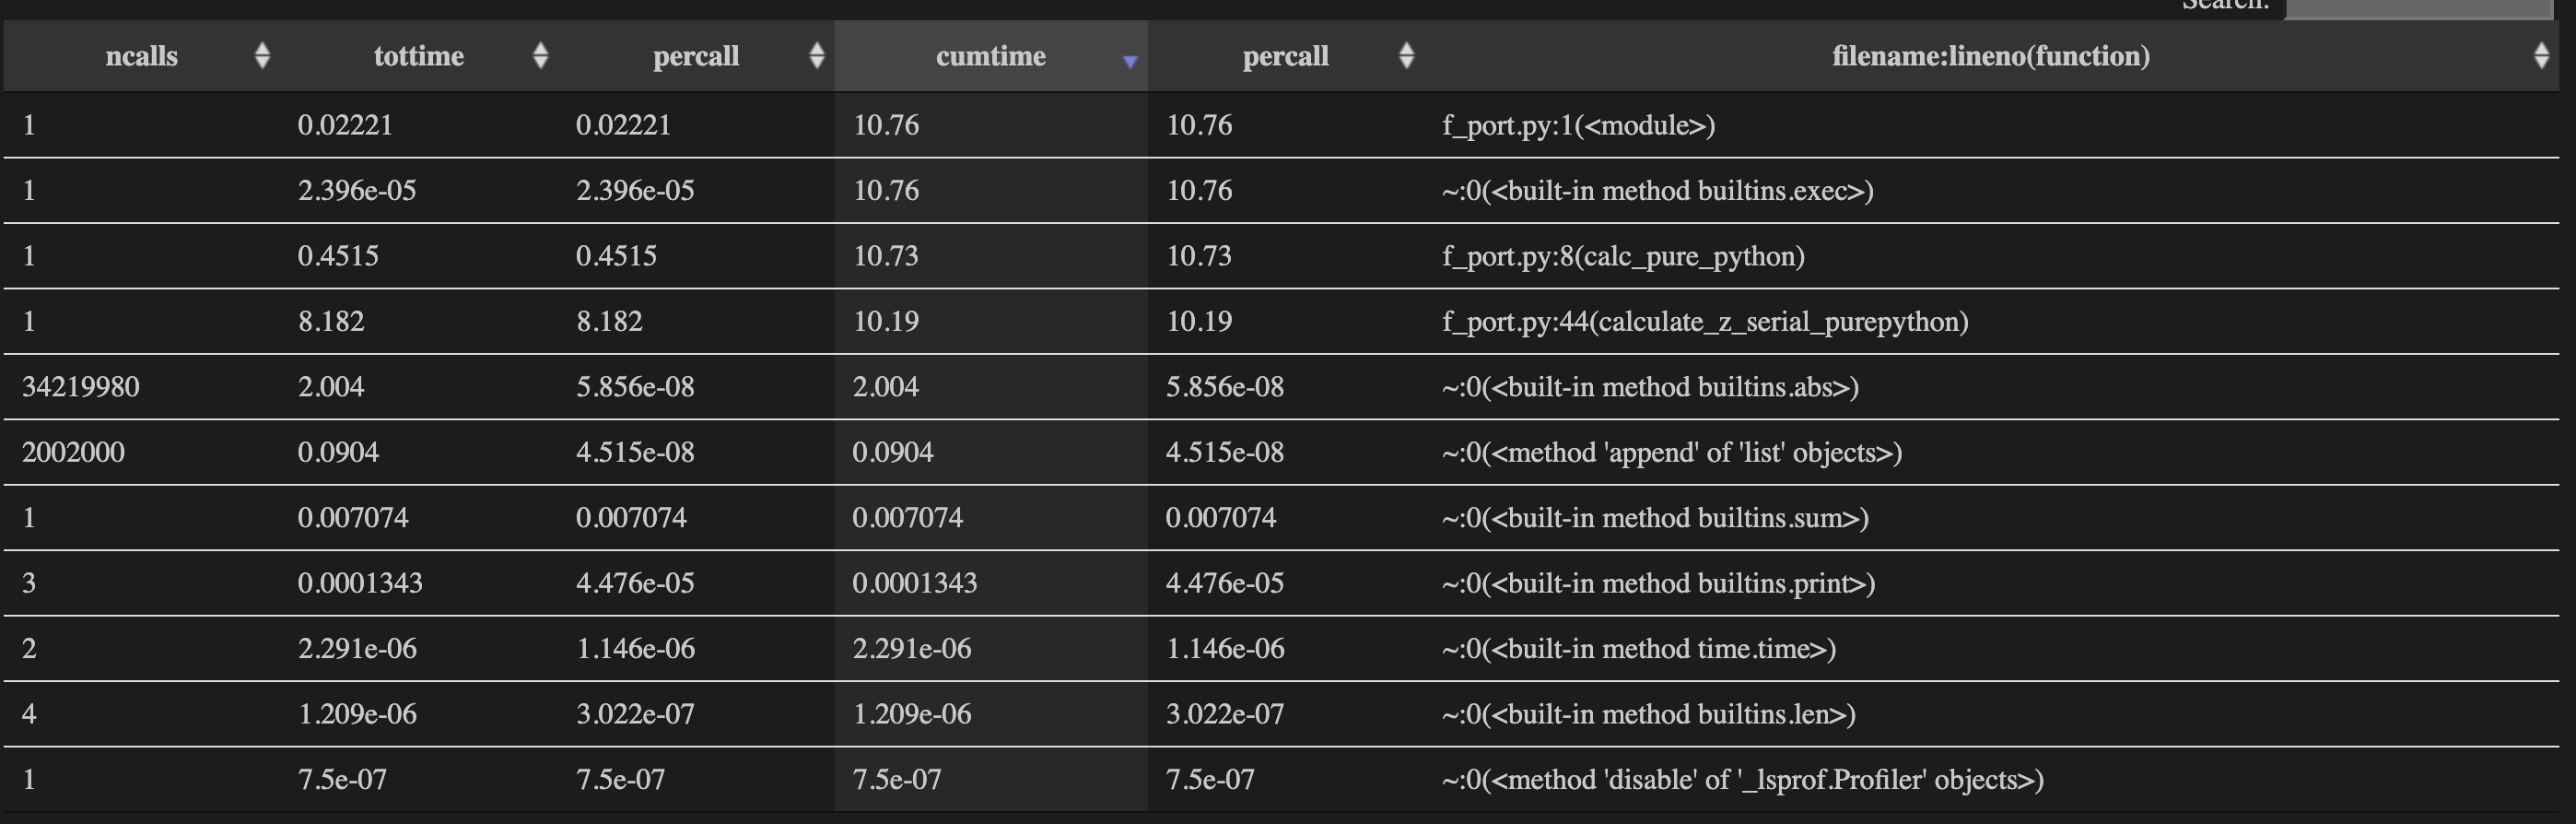


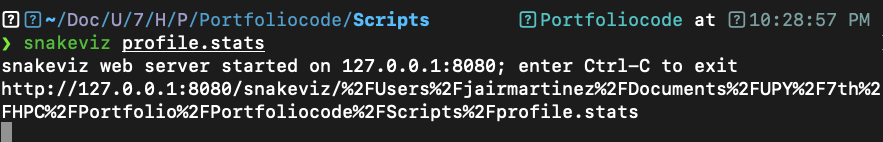

### Syntesis

### Profiling Overview
SnakeViz has been used to visualize the performance profile of the `f_port.py` script. It presents an interactive Sunburst chart (Icicle style) that depicts the relative time consumed by different parts of the code.

### Visualization Summary
- The Sunburst chart illustrates the execution time as proportional segments, with `calculate_z_serial_purepython` function being the most prominent, indicating it as the main performance bottleneck.
- The chart's color coding and segment sizes visually emphasize the most time-consuming functions.

### Profiling Statistics
- **Top-level Call**: `builtins.exec` shows that the script execution from top level took 10.8 seconds.
- **Module Execution**: The module `<module>` within `f_port.py` corresponds to the entire script's execution time of 10.8 seconds.
- **Function Execution**: The function `calc_pure_python` is called next and takes nearly the same time, suggesting it is a wrapper or the main function that includes almost all execution logic.
- **Main Computational Function**: The `calculate_z_serial_purepython` function, located at line 44 in `f_port.py`, consumes 10.2 seconds, aligning closely with the total runtime.

### Profiling Data Table
- **Calls to Built-in Functions**:
  - `builtins.abs`: Executed 34,219,980 times, indicating extensive use of the absolute value computation.
  - `list.append`: Invoked 2,002,000 times, showing significant list operations during the script's execution.

- **Other Functions**:
  - `builtins.sum`, `builtins.print`, `time.time`, and `builtins.len` have a nominal impact on the overall execution time but are essential for the function's logic.
  
### Conclusion
The `calculate_z_serial_purepython` function in `f_port.py` is the most time-consuming part of the script. Optimizing this function's internal logic and its use of Python's built-in functions and data structures would likely result in the most significant performance improvements.



# Line_Profiler

After adding the @profile to the function calculate_z_serial_purepython it is needed to input an specific command using the kernprof.py file so you can get the analysis of the function and the time it takes. It is shown as follows, including the needed command.


```$ kenprof -l -v f_port_lineprofiler.py  ``` 

### Output

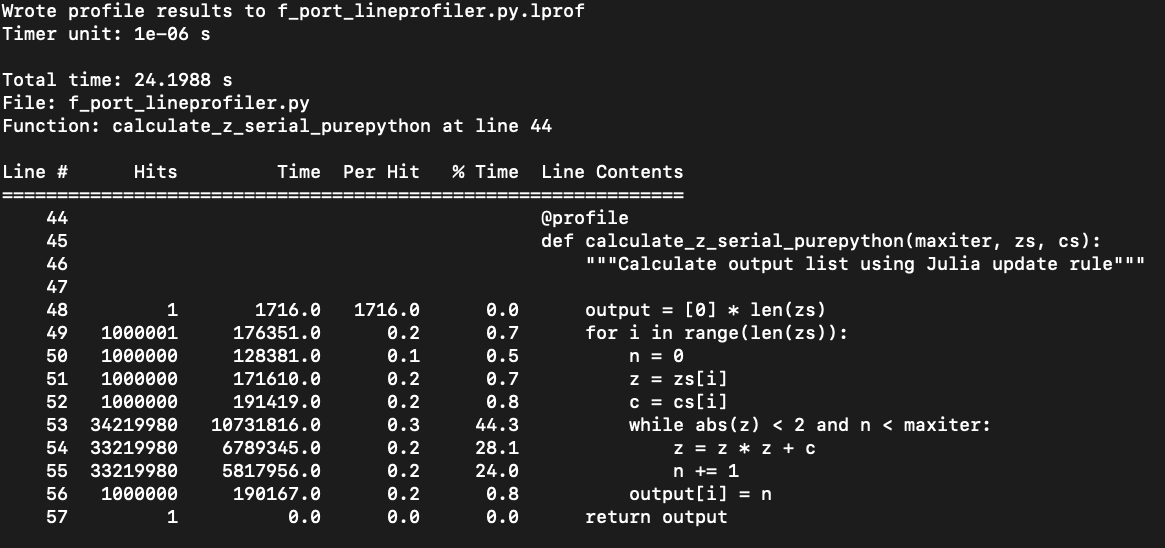

### Syntesis
#### Line Profiling Analysis of `calculate_z_serial_purepython`

### Profiling Context
- **Profiler Used**: Line Profiler for Python
- **Total Time Taken**: 24.1988 seconds
- **Profiled Function**: `calculate_z_serial_purepython` at line 44

### Line by Line Execution Time
- **Line 48**: Initialization of `output` list took 0.0% of the total time.
- **Lines 49-56**: The loop iterating over `zs` list elements where most of the time is spent.
  - **Line 53**: The `while` loop containing the core calculation takes the majority of the execution time (44.3%).
  - **Line 54**: Updating the variable `z` with `z = z * z + c` accounts for 28.1% of the total time.
  - **Line 55**: Incrementing the iteration counter `n` takes up 24.0% of the time.
- **Lines 49, 50, 51, 52, and 56**: These lines, including the loop declaration and simple assignments, are relatively negligible in execution time.

### Performance Hotspots
- **`while` Loop**: Line 53 is the most significant performance hotspot and should be the primary target for optimization.
- **Complex Number Calculations**: Lines 54 and 55 involve complex number calculations and are also significant contributors to the execution time.


### Conclusion
The `calculate_z_serial_purepython` function's performance is heavily impacted by the calculations within the `while` loop, especially the complex number arithmetic. Focusing optimization efforts on this part of the code is crucial for improving the overall execution time of the script.


# Memory_Profiler

Lowering the desired width in the code since, as it is mentioned in the book, when using 1000, it may take a while when applying the memory profiler.

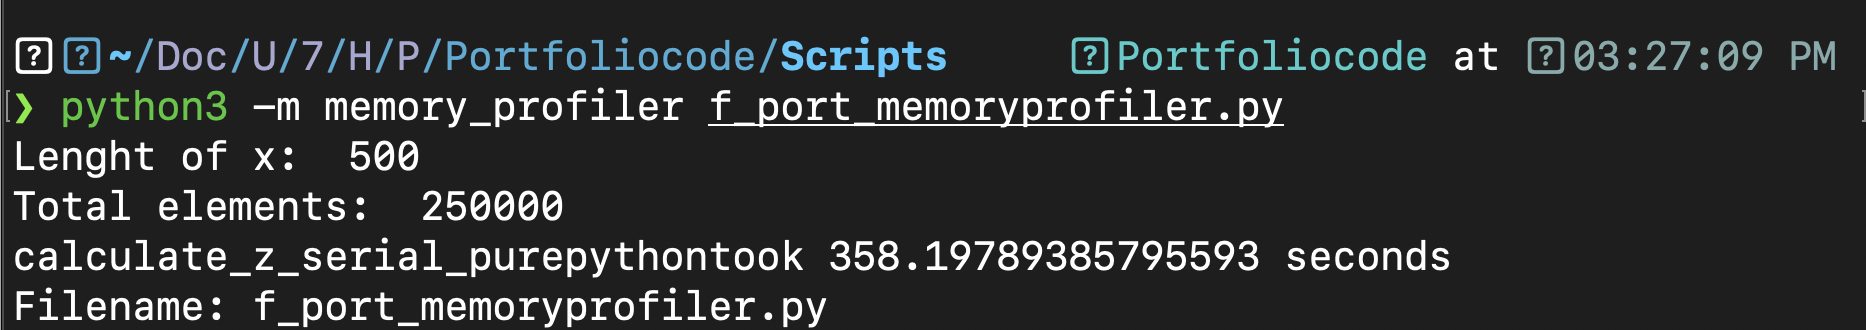

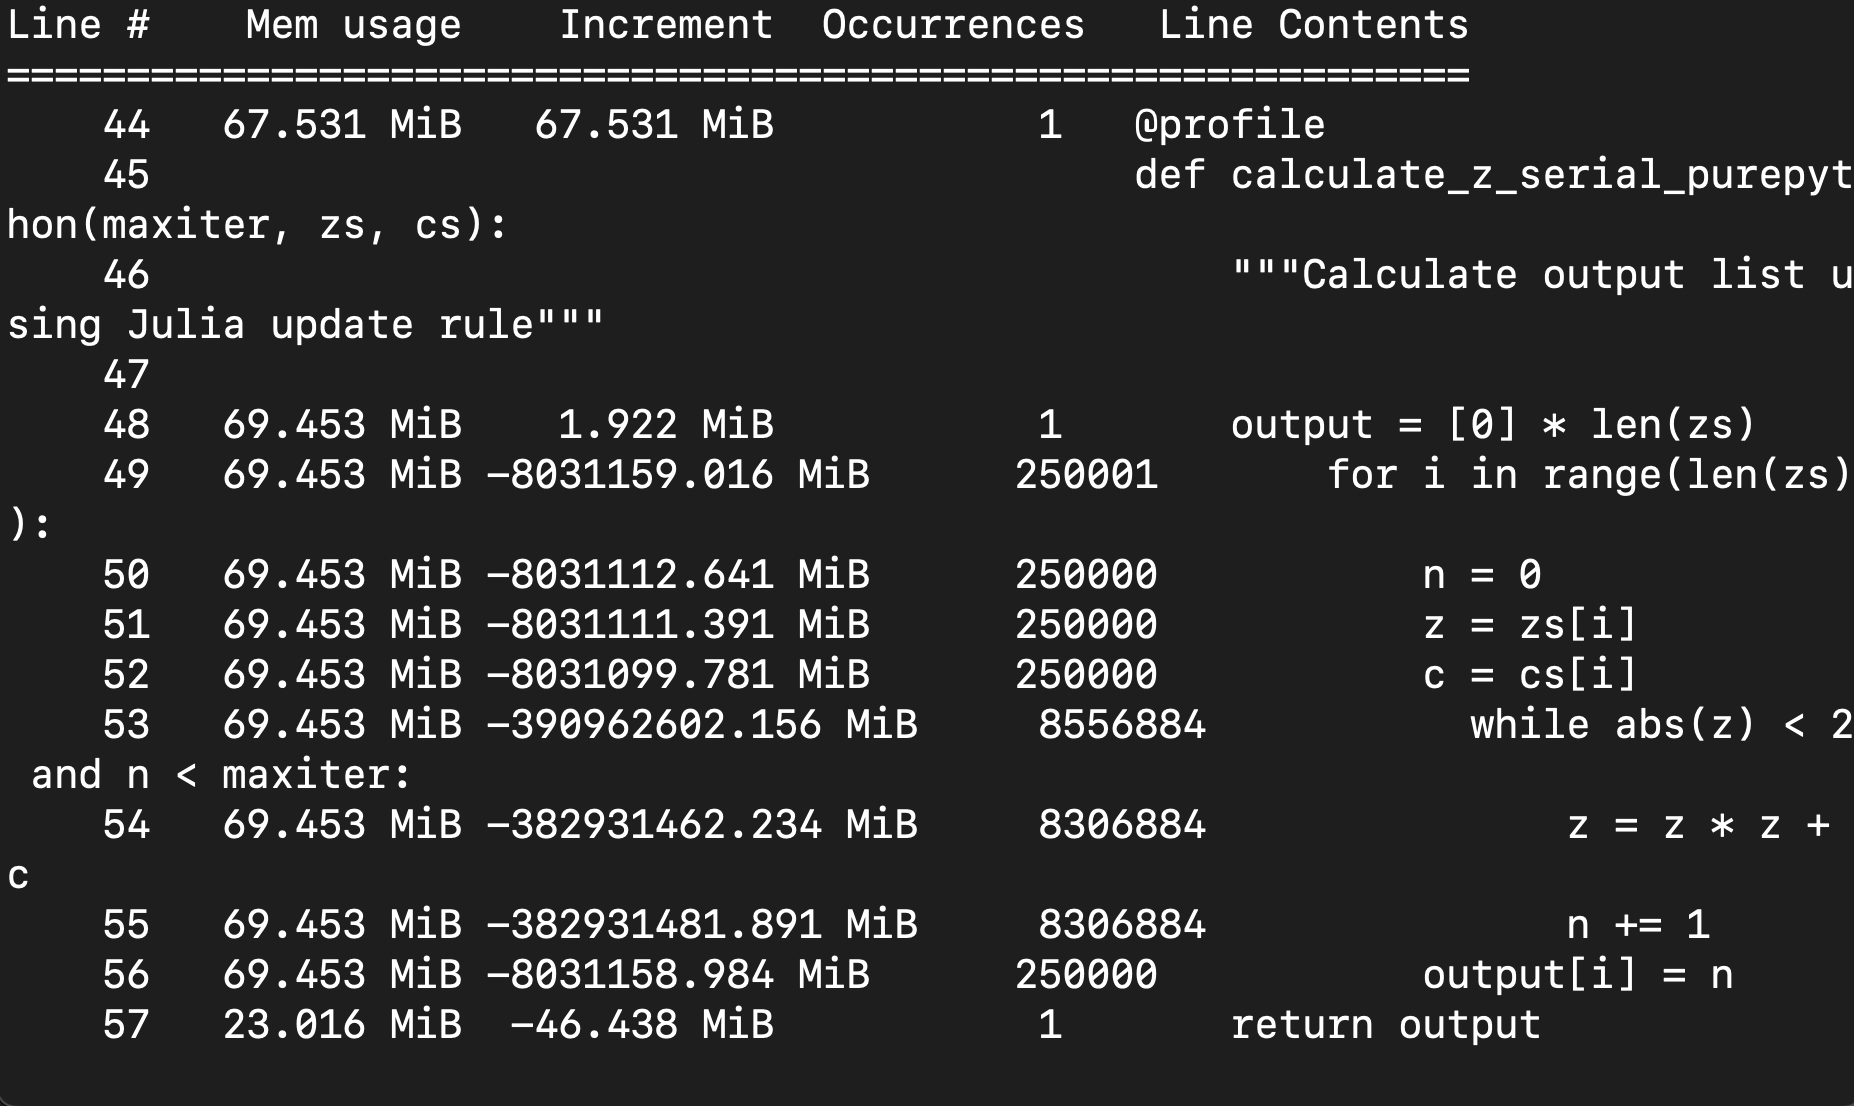



### Syntesis

### Memory Profiling of `calculate_z_serial_purepython`

### Profiling Context
- **Memory Profiling Tool**: Python Memory Profiler
- **Function Profiled**: `calculate_z_serial_purepython`

### Memory Usage Overview
- Initial memory usage at **line 44** is 67.531 MiB.

### Line by Line Memory Usage
- **Line 48**: Creation of `output` list increases memory by 1.922 MiB.
- **Lines 49-56**: These lines are within a loop and show a significant negative memory increment which is unusual and suggests a potential error in memory reporting or a profiler artifact.
  - **Negative Memory Increments**: Lines 49 to 56 show large negative values for memory increment, which are not typical and could indicate deallocations or an issue with the memory profiler's reporting mechanism.

### Analysis of Memory Profiling Data
- **Line 48**: Modest memory allocation for initializing `output` list.
- **Loop Execution**: The loop starting at **line 49** seems to be where memory deallocation occurs. However, negative memory usage is not expected under normal profiling circumstances and likely indicates an anomaly in profiling data.

### Memory Hotspots and Recommendations
- **Verification Needed**: The negative memory increments suggest a need for further investigation or re-profiling to ensure accurate memory usage reporting.
- **Line 48 Memory Allocation**: Despite the profiling anomaly, the initial list allocation seems to be the only point of actual memory increase.

### Conclusion
The memory profiling data for `calculate_z_serial_purepython` exhibits irregularities with negative memory increments, warranting a re-run of the memory profiler or further investigation into memory management within the function.



# Part 2. lists and tuples

In [38]:
import timeit
import pandas as pd

# Define the number of elements to test with
ns = [10000, 20000, 30000]

# Prepare the table structure
table = {
    "Code": ["list.pop()", "list.pop(0)", "list.append(1)", "list.insert(0, 1)"],
    "N=10000 (µs)": [],
    "N=20000 (µs)": [],
    "N=30000 (µs)": [],
    "Time Complexity": ["O(1)", "O(N)", "O(1)", "O(N)"]
}

In [39]:
# Function to measure the time of an operation
def measure_time(code, setup, number=1000):
    """Measure the execution time of a code snippet"""
    # Run the timeit measurement
    time = timeit.timeit(stmt=code, setup=setup, number=number)
    # Convert to microseconds for readability
    return time / number * 1e6

# Operations to test
operations = [
    "lst.pop()",
    "lst.pop(0)",
    "lst.append(1)",
    "lst.insert(0, 1)"
]

In [40]:
# Measure the execution time for each operation and N
for N in ns:
    setup = f"lst = list(range({N}))"
    for op, name in zip(operations, table["Code"]):
        # The setup code will create a list 'lst' with N elements
        time = measure_time(code=op, setup=setup)
        # Append the time to the corresponding column in the table
        table[f"N={N} (µs)"].append(time)

# Create a pandas DataFrame for pretty display and further manipulation
df = pd.DataFrame(table)
df

,Code,N=10000 (µs),N=20000 (µs),N=30000 (µs),Time Complexity
0,list.pop(),0.047042,0.045375,0.029542,O(1)
1,list.pop(0),2.601333,5.333125,8.174875,O(N)
2,list.append(1),0.027334,0.019334,0.025458,O(1)
3,"list.insert(0, 1)",10.689708,17.223875,27.550125,O(N)


In [41]:
from collections import deque

In [42]:
deque_table = {
    "Code": ["deque.pop()", "deque.popleft()", "deque.append(1)", "deque.appendleft(1)"],
    "N=10000 (µs)": [],
    "N=20000 (µs)": [],
    "N=30000 (µs)": [],
    "Time Complexity": ["O(1)", "O(1)", "O(1)", "O(1)"]  # Deque operations are O(1)
}

In [43]:
# Deque operations to test
deque_operations = [
    "d.pop()",
    "d.popleft()",
    "d.append(1)",
    "d.appendleft(1)"
]

In [45]:
# Measure the execution time for each deque operation and N
for N in ns:
    # The setup code will create a deque 'd' with N elements
    setup = f"from collections import deque\nd = deque(range({N}))"
    for op, name in zip(deque_operations, deque_table["Code"]):
        # Measure the time of the deque operation
        time = measure_time(code=op, setup=setup)
        
        # Append the time to the corresponding column in the table
        deque_table[f"N={N} (µs)"].append(time)


In [46]:
# Convert the results to a pandas DataFrame for display
deque_df = pd.DataFrame(deque_table)
deque_df

,Code,N=10000 (µs),N=20000 (µs),N=30000 (µs),Time Complexity
0,deque.pop(),0.027208,0.026666,0.025333,O(1)
1,deque.popleft(),0.025166,0.024542,0.024292,O(1)
2,deque.append(1),0.034208,0.027917,0.028375,O(1)
3,deque.appendleft(1),0.033542,0.025334,0.024750,O(1)


In [47]:
# Let's define the operations to measure access time in a deque
access_operations = [
    "d[0]",                # Accessing the first element
    "d[N-1]",              # Accessing the last element
    "d[int(N/2)]"          # Accessing the middle element
]

In [51]:

# This dictionary will store the results
access_results = {op: {N: None for N in ns} for op in access_operations}

# The time complexity for accessing elements by index in a deque is O(N)
access_time_complexities = ["O(N)", "O(N)", "O(N)"]


In [52]:
# Time the access operations for different sizes N
for N in ns:
    setup_code = f"from collections import deque\nd = deque(range({N}))"
    for operation in access_operations:
        # Replace N with the actual size in the operation
        op_code = operation.replace('N', str(N))
        # Time the operation
        timer = timeit.Timer(op_code, setup_code)
        # Take the best of 5 runs with 1000 executions each
        best_time = min(timer.repeat(repeat=5, number=1000))
        # Convert time to microseconds and store in the results dictionary
        access_results[operation][N] = best_time * 1e6  # convert to microseconds


In [53]:
# Convert the results to a pandas DataFrame for display
results_table = {
    "Code": access_operations,
    "N=10000 (µs)": [access_results[op][10000] for op in access_operations],
    "N=20000 (µs)": [access_results[op][20000] for op in access_operations],
    "N=30000 (µs)": [access_results[op][30000] for op in access_operations],
    "Time Complexity": access_time_complexities
}

access_df = pd.DataFrame(results_table)
access_df

,Code,N=10000 (µs),N=20000 (µs),N=30000 (µs),Time Complexity
0,d[0],25.000001,21.833002,22.665998,O(N)
1,d[N-1],24.833003,21.915999,22.125001,O(N)
2,d[int(N/2)],189.250000,287.041003,411.374996,O(N)


### Overallocation

Overallocation in Python lists is refered to as the strategy used by the python list implementation to avoid frequent memory allocations. Python optimizes this process by allocating more memory than is immediately necessary.

A way more conscice and easy to understand explanation is, when you create a list and start appending items, Python does not allocate space for the new item, it allocates space for a number of additional items. As you keep appending items, the list uses this pre-allocated or, as mentioned, overallocated space. 
Finally, when this space runs out, Python keeps allocating a new larger block of memory for the list's items, again including the extra space. 

Basically, overallocating makes sure that adding an item to the end of a list is a constant time operation, despite the occasional need for an expensive resize operation. This is a classic example of a space-time trade-off. 

# Part 3. Dictionaries and Sets

In [55]:
import geopandas as gpd

In [56]:
AGEB_2010 = gpd.read_file("/Users/jairmartinez/Documents/UPY/7th/HPC/Portfolio/Portfoliocode/Data/702825292812_s/mgau2010v5_0/AGEB_urb_2010_5.shp")
AGEB_2010

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry
0,LA_6052,0100100013204,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,1,"POLYGON ((2475018.434 1098724.434, 2475012.982..."
1,LA_6052,0100100013721,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,2,"POLYGON ((2475469.244 1098964.293, 2475431.454..."
2,LA_6052,0100100010657,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,3,"POLYGON ((2470787.576 1096193.647, 2470787.327..."
3,LA_6052,0100100011528,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,4,"POLYGON ((2470709.683 1097766.390, 2470705.629..."
4,LA_6052,0100100011674,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,5,"POLYGON ((2466998.954 1095069.117, 2467001.023..."
...,...,...,...,...,...,...,...,...
56190,LA_6052,3205800010087,ÁREA GEOESTADÍSTICA BÁSICA,06/2009,ÁREA,INEGI,56191,"POLYGON ((2354830.691 1056971.321, 2354952.210..."
56191,LA_6052,3205800010104,ÁREA GEOESTADÍSTICA BÁSICA,06/2009,ÁREA,INEGI,56192,"POLYGON ((2354223.827 1056675.566, 2354226.873..."
56192,LA_6052,320580001002A,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,56193,"POLYGON ((2355534.722 1055984.929, 2355492.289..."
56193,LA_6052,3205800010015,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,56194,"POLYGON ((2354810.141 1055588.501, 2354804.730..."


In [68]:
yucatan_agebs_2010 = AGEB_2010[AGEB_2010['CVEGEO'].str.startswith('31')]
yucatan_agebs_2010

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry,category
52973,LA_6052,3100100010130,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,52974,"POLYGON ((3776839.076 1015624.342, 3776863.810...",constant
52974,LA_6052,3100100010126,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,52975,"POLYGON ((3776247.741 1014594.337, 3776229.180...",constant
52975,LA_6052,3100100010111,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,52976,"POLYGON ((3776886.893 1014389.348, 3776885.095...",constant
52976,LA_6052,3100100010164,ÁREA GEOESTADÍSTICA BÁSICA,08/2010,ÁREA,INEGI,52977,"POLYGON ((3776058.187 1014722.134, 3776141.758...",constant
52977,LA_6052,3100100010145,ÁREA GEOESTADÍSTICA BÁSICA,08/2010,ÁREA,INEGI,52978,"POLYGON ((3776616.765 1015514.116, 3776745.478...",constant
...,...,...,...,...,...,...,...,...,...
54408,LA_6052,3110500010065,ÁREA GEOESTADÍSTICA BÁSICA,10/2010,ÁREA,INEGI,54409,"POLYGON ((3800219.705 1063318.042, 3800202.592...",constant
54409,LA_6052,3110500010027,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,54410,"POLYGON ((3799916.703 1062993.265, 3799876.659...",constant
54410,LA_6052,3110600010043,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,54411,"POLYGON ((3829044.776 1084348.788, 3829026.034...",constant
54411,LA_6052,3110600010077,ÁREA GEOESTADÍSTICA BÁSICA,10/2010,ÁREA,INEGI,54412,"POLYGON ((3829670.516 1084013.800, 3829863.653...",constant


In [60]:
AGEB_2020 = gpd.read_file("/Users/jairmartinez/Documents/UPY/7th/HPC/Portfolio/Portfoliocode/Data/31_yucatan/conjunto_de_datos/31a.shp")
AGEB_2020

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,3100100010130,31,001,0001,0130,"POLYGON ((3776847.045 1015576.473, 3776850.565..."
1,3100100010145,31,001,0001,0145,"POLYGON ((3776745.860 1015499.562, 3776745.439..."
2,3100100010164,31,001,0001,0164,"POLYGON ((3776136.004 1014614.653, 3776022.228..."
3,3100100010126,31,001,0001,0126,"POLYGON ((3776247.740 1014594.755, 3776229.182..."
4,3100100010107,31,001,0001,0107,"POLYGON ((3776613.825 1015270.341, 3776615.972..."
...,...,...,...,...,...,...
1527,3101900630421,31,019,0063,0421,"POLYGON ((3982590.953 1058734.415, 3982559.676..."
1528,3101900630436,31,019,0063,0436,"POLYGON ((3981881.868 1056993.706, 3981910.041..."
1529,3101900620012,31,019,0062,0012,"POLYGON ((3948903.252 1034634.683, 3949053.535..."
1530,3101900620031,31,019,0062,0031,"POLYGON ((3948921.666 1033345.003, 3948961.994..."


In [83]:
# Creating the ID with the AGEB a set from both years
ids_2010 = set(yucatan_agebs_2010['CVEGEO'])
ids_2020 = set(AGEB_2020['CVEGEO'])

# Creating the asked results from the PDF
agebs_constant = ids_2010.intersection(ids_2020)
agebs_new_2020 = ids_2020.difference(ids_2010)
agebs_dissapeared = ids_2010.difference(ids_2020)

In [84]:
# Counting and showing the exact number
count_constant = len(agebs_constant)
count_new_2020 = len(agebs_new_2020)
count_disappeared = len(agebs_dissapeared)

print(f"Remaining:{count_constant} \nNew AGEBs {count_new_2020} \nAGEBS that dissapeared {count_disappeared}")

Remaining:1419 
New AGEBs 113 
AGEBS that dissapeared 21


In [85]:
# Setting categories so the visualization is way easier
yucatan_agebs_2010['category'] = yucatan_agebs_2010['CVEGEO'].apply(lambda x: 'constant' if x in agebs_constant else 'disappeared')
AGEB_2020['category'] = AGEB_2020['CVEGEO'].apply(lambda x: 'constant' if x in agebs_constant else 'new')

/Users/jairmartinez/Documents/UPY/7th/HPC/Portfolio/Portfoliocode/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [75]:
import matplotlib.pyplot as plt
import contextily as ctx

#### Yucatán AGEB Map Visualization explanation

The map visualization presents the changes in Área Geoestadística Básica (AGEB) units in Yucatán between 2010 and 2020:

- **Disappeared AGEBs (Light Grey):** These AGEBs were present in 2010 but not in 2020, indicating areas that have undergone administrative changes or reclassification.

- **Constant AGEBs (Blue):** AGEBs that appear in both 2010 and 2020 datasets, reflecting stability in the region's administrative divisions over the decade.

- **New AGEBs (Green):** AGEBs that are new in the 2020 dataset, representing growth or changes in administrative recognition since 2010.


/var/folders/7c/4cf3ksfd16nb16xxzztzhsmr0000gn/T/ipykernel_24307/2605042097.py:14: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


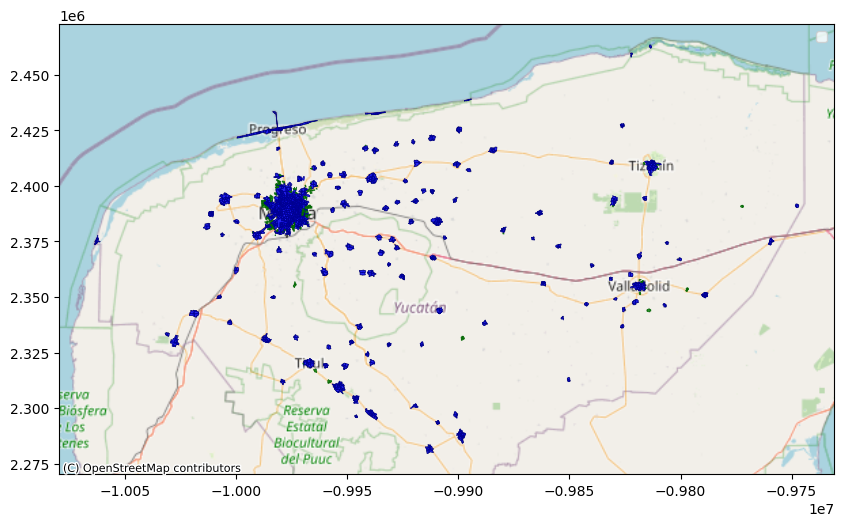

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))

# Convert data to Web Mercator (EPSG:3857)
yucatan_agebs_2010 = yucatan_agebs_2010.to_crs(epsg=3857)
AGEB_2020 = AGEB_2020.to_crs(epsg=3857)

# Plot the data
yucatan_agebs_2010.plot(ax=ax, color='grey', edgecolor='black', linewidth=0.5, alpha=0.5, label='Disappeared')
AGEB_2020[AGEB_2020['category'] == 'constant'].plot(ax=ax, color='blue', edgecolor='darkblue', linewidth=0.5, alpha=0.8, label='Constant')
AGEB_2020[AGEB_2020['category'] == 'new'].plot(ax=ax, color='green', edgecolor='darkgreen', linewidth=0.5, alpha=0.8, label='New')

# Add the basemap for context, using OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.legend()

plt.show()

# Part 4. Matrix and Vector Computations

## Rewriting the particle simulator in NumPy

In [91]:
import numpy as np 
import time

In [93]:
class Particle: 
    def __init__(self, x, y, ang_vel):
        self.x = x
        self.y = y
        self.ang_vel = ang_vel

#### Pure Python version

In [94]:
class ParticleSimulator:
    def __init__(self, particles):
        self.particles = particles

    def evolve_python(self, dt):
        timestep = 0.00001
        nsteps = int(dt/timestep)

        for _ in range(nsteps):
            for p in self.particles:
                norm = (p.x**2 + p.y**2)**0.5
                v_x = (-p.y) / norm
                v_y = p.x / norm
                
                d_x = timestep * p.ang_vel * v_x
                d_y = timestep * p.ang_vel * v_y
                
                p.x += d_x
                p.y += d_y

#### NumPy Version 

In [95]:
# Numpy Version of the particle simulator 
class ParticleSimulatorNumpy(ParticleSimulator):
    def evolve_numpy(self, dt):
        timestep = 0.00001
        nsteps = int(dt/timestep)
        
        # Convert particle attributes to NumPy arrays
        r_i = np.array([[p.x, p.y] for p in self.particles])
        ang_vel_i = np.array([p.ang_vel for p in self.particles])
        
        for _ in range(nsteps):
            norm_i = np.sqrt((r_i ** 2).sum(axis=1))
            v_i = r_i[:, [1, 0]]
            v_i[:, 0] *= -1
            v_i /= norm_i[:, np.newaxis]
            
            d_i = timestep * ang_vel_i[:, np.newaxis] * v_i
            r_i += d_i
            
        # Update original particle positions
        for i, p in enumerate(self.particles):
            p.x, p.y = r_i[i]

In [97]:
def benchmark(n_particles, method):
    """ 
    Function to create the benchmarking timing, between the Python only and NumPy versions
    """
    particles = [Particle(0.3, 0.5, 1) for _ in range(n_particles)]
    
    if method == 'python':
        simulator = ParticleSimulator(particles)
        start = time.time()
        simulator.evolve_python(0.1)
    elif method == 'numpy':
        simulator = ParticleSimulatorNumpy(particles)
        start = time.time()
        simulator.evolve_numpy(0.1)
    
    end = time.time()
    
    return end - start

#### Results
The resulst crearly show the significant performance improvement achieved by using Numpy to perform vectorized operations instead of pure Python Loops. Specifically, the Numpy version is about twice as fast as the pure Python version for 100 particles and more than seven times faster for 1000 particles. This does not only proves the superior perfomrnace of the Numpy version but also the scalability with increasing the number of Particles. 

In [98]:
# Testing the performance with 100 and 1000 particles
results = {
    "100 particles": {
        "python": benchmark(100, 'python'),
        "numpy": benchmark(100, 'numpy')
    },
    "1000 particles": {
        "python": benchmark(1000, 'python'),
        "numpy": benchmark(1000, 'numpy')
    }
}

results

{'100 particles': {'python': 0.40392184257507324, 'numpy': 0.1344308853149414},
 '1000 particles': {'python': 3.631627082824707, 'numpy': 0.30788588523864746}}

## Optimal performance with numexpr

In [100]:
import numexpr as ne 
import time

In [101]:
# Numpy implementation for calculating distance matrix

def distance_matrix_numpy(r):
    r_i = r[:, np.newaxis, :]
    r_j = r[np.newaxis, :, :]
    d_ij = np.sqrt(((r_j - r_i)**2).sum(axis=2))
    return d_ij

In [102]:
def distance_matrix_numexpr(r):
    r_i = r[:, np.newaxis, :]
    r_j = r[np.newaxis, :, :]
    d_ij_squared = ne.evaluate('sum((r_j-r_i)**2, axis=2)')
    d_ij = np.sqrt(d_ij_squared)
    return d_ij

In [103]:
# Benchmark function
def benchmark(func, r):
    start = time.time()
    func(r)
    end = time.time()
    return end - start

### Result 
This comparsion clearly shows that the numexpr implementation is approximately twice as fast as the NumPy implementation for this specific task.

This demonstrates the advantage of using numexpr for optimizing complex array operations, particulary when dealing with large arrays where memory efficiency and leveraging multiple processors can lead to significant performance improvements.

In [109]:
# Generating random particle positions
r = np.random.rand(1000, 2)  # 1000 particles in 2D space

# Measuring execution time
numpy_time = benchmark(distance_matrix_numpy, r)
numexpr_time = benchmark(distance_matrix_numexpr, r)

print(f"Benchmark for the NumPy version {numpy_time} seconds \nBenchmark for the Numexpr version {numexpr_time} seconds")

Benchmark for the NumPy version 0.04570794105529785 seconds 
Benchmark for the Numexpr version 0.00847005844116211 seconds
